In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import collections
import random
import math
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn
import math

In [2]:
SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 50
plt.rcParams["figure.figsize"] = (30,15)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)

**Data for Training and Testing**

In [3]:
training_set =pd.read_csv("train.csv")
testing_set=pd.read_csv("test.csv")
testing_labels=pd.read_csv("submit.csv")
testing_set=pd.merge(testing_set, testing_labels)

**Pre-Processing**

In [4]:
def replace_unwanted_characters(word):
    return "".join([char for char in word if char.isalpha()]).lower()
def text_cleaning(text):        
    return [word for word in [replace_unwanted_characters(word) for word in str(text).split(" ")] if word!='']
def author_cleaning(text):
    return [" ".join([word for word in [replace_unwanted_characters(word) for word in text.split(" ")] if word!=''])]

In [5]:
training_set["text"]=list(map(text_cleaning,training_set["text"]))
training_set["title"] = training_set["title"].replace(np.nan, "no_title")
training_set["title"]=list(map(text_cleaning,training_set["title"]))
training_set["author"] = training_set["author"].replace(np.nan, "no_author")
training_set["author"]=list(map(author_cleaning,training_set["author"]))

**Data Visualization**

In [6]:
def swap_keys_with_values(dictionary):
    new_dictionary={}
    for key,value in dictionary.items():
        new_dictionary[value]=key
    return new_dictionary

def top_k_most_frequent_words(dictionary,k):
    most_frequent_words={}
    if k>len(dictionary):
        print("There are less than {} in the dictionary, pick a number less than or equal to {}".format(k,len(dictionary)))
        return 
    for key in sorted(list(dictionary.keys()))[-k:]:
        most_frequent_words[dictionary[key]]=key
    return most_frequent_words

def unique_words_between_two_dictionaries(dictionary_1,dictionary_2,output_common_words=False):
    common_words=[word for word in dictionary_1.keys() if word in dictionary_2.keys()]
    for word in common_words:
        del dictionary_1[word]
        del dictionary_2[word]
    if output_common_words==True:
        return common_words,dictionary_1,dictionary_2
    return dictionary_1,dictionary_2

def count_frequency_of_words_per_feature(dataframe,feature):
    reliable_feature_word_count,unreliable_feature_word_count={},{}
    for i in range(len(dataframe)):
        if dataframe["label"][i]==0:
            for word in dataframe[feature][i]:
                if word not in reliable_feature_word_count:
                    reliable_feature_word_count[word]=1
                else:
                    reliable_feature_word_count[word]+=1
        else:
            for word in dataframe[feature][i]:
                if word not in unreliable_feature_word_count:
                    unreliable_feature_word_count[word]=1
                else:
                    unreliable_feature_word_count[word]+=1
    return reliable_feature_word_count,unreliable_feature_word_count

def create_visualization_of_top_words(dictionary,feature,common=False,reliable=False):
    df = pd.DataFrame(data=[i for i in list(dictionary.values())[::-1]],columns=["Words"], index = [word for word in list(dictionary.keys())[::-1]])
    df.plot.barh()
    if feature=="author" and reliable==True:
        plt.title('Top {} reliable news authors'.format(len(df),feature))
        plt.ylabel('Authors')
        plt.xlabel('Number of reliable articles written')
        plt.show()
        return
    if feature=="author" and reliable==False:
        plt.title('Top {} unreliable news authors'.format(len(df),feature))
        plt.ylabel('Authors')
        plt.xlabel('Number of reliable articles written')
        plt.show()
        return
    if common==True:
        plt.title('Top {} common words between unreliable and reliable news {}'.format(len(df),feature))
        plt.ylabel('Words')
        plt.xlabel('Frequency')
        plt.show()
        return
    if reliable==True:
        plt.title('Top {} words unique to reliable news {}s'.format(len(df),feature))
        plt.ylabel('Words')
        plt.xlabel('Frequency')
        plt.show()
        return
    if reliable==False:
        plt.title('Top {} words unique to unreliable news {}s'.format(len(df),feature))
        plt.ylabel('Words')
        plt.xlabel('Frequency')
        plt.show()
        return
    

In [7]:
Reliable_articles_texts,Unreliable_articles_texts=count_frequency_of_words_per_feature(training_set,'text')

Reliable_articles_texts=swap_keys_with_values(Reliable_articles_texts)
Unreliable_articles_texts=swap_keys_with_values(Unreliable_articles_texts)

common_words,unique_reliable_words,unique_unreliable_words=unique_words_between_two_dictionaries(top_k_most_frequent_words(Reliable_articles_texts,240),top_k_most_frequent_words(Unreliable_articles_texts,240),output_common_words=True)

In [8]:
Reliable_articles_authors,Unreliable_articles_authors=count_frequency_of_words_per_feature(training_set,"author")

Reliable_articles_authors=swap_keys_with_values(Reliable_articles_authors)
Unreliable_articles_authors=swap_keys_with_values(Unreliable_articles_authors)

common_authors,unique_reliable_authors,unique_unreliable_authors=unique_words_between_two_dictionaries(top_k_most_frequent_words(Reliable_articles_authors,60),top_k_most_frequent_words(Unreliable_articles_authors,60),output_common_words=True)

In [9]:
Reliable_articles_titles,Unreliable_articles_titles=count_frequency_of_words_per_feature(training_set,"title")

Reliable_articles_titles=swap_keys_with_values(Reliable_articles_titles)
Unreliable_articles_titles=swap_keys_with_values(Unreliable_articles_titles)

common_titles,unique_reliable_titles,unique_unreliable_titles=unique_words_between_two_dictionaries(top_k_most_frequent_words(Reliable_articles_titles,15),top_k_most_frequent_words(Unreliable_articles_titles,15),output_common_words=True)

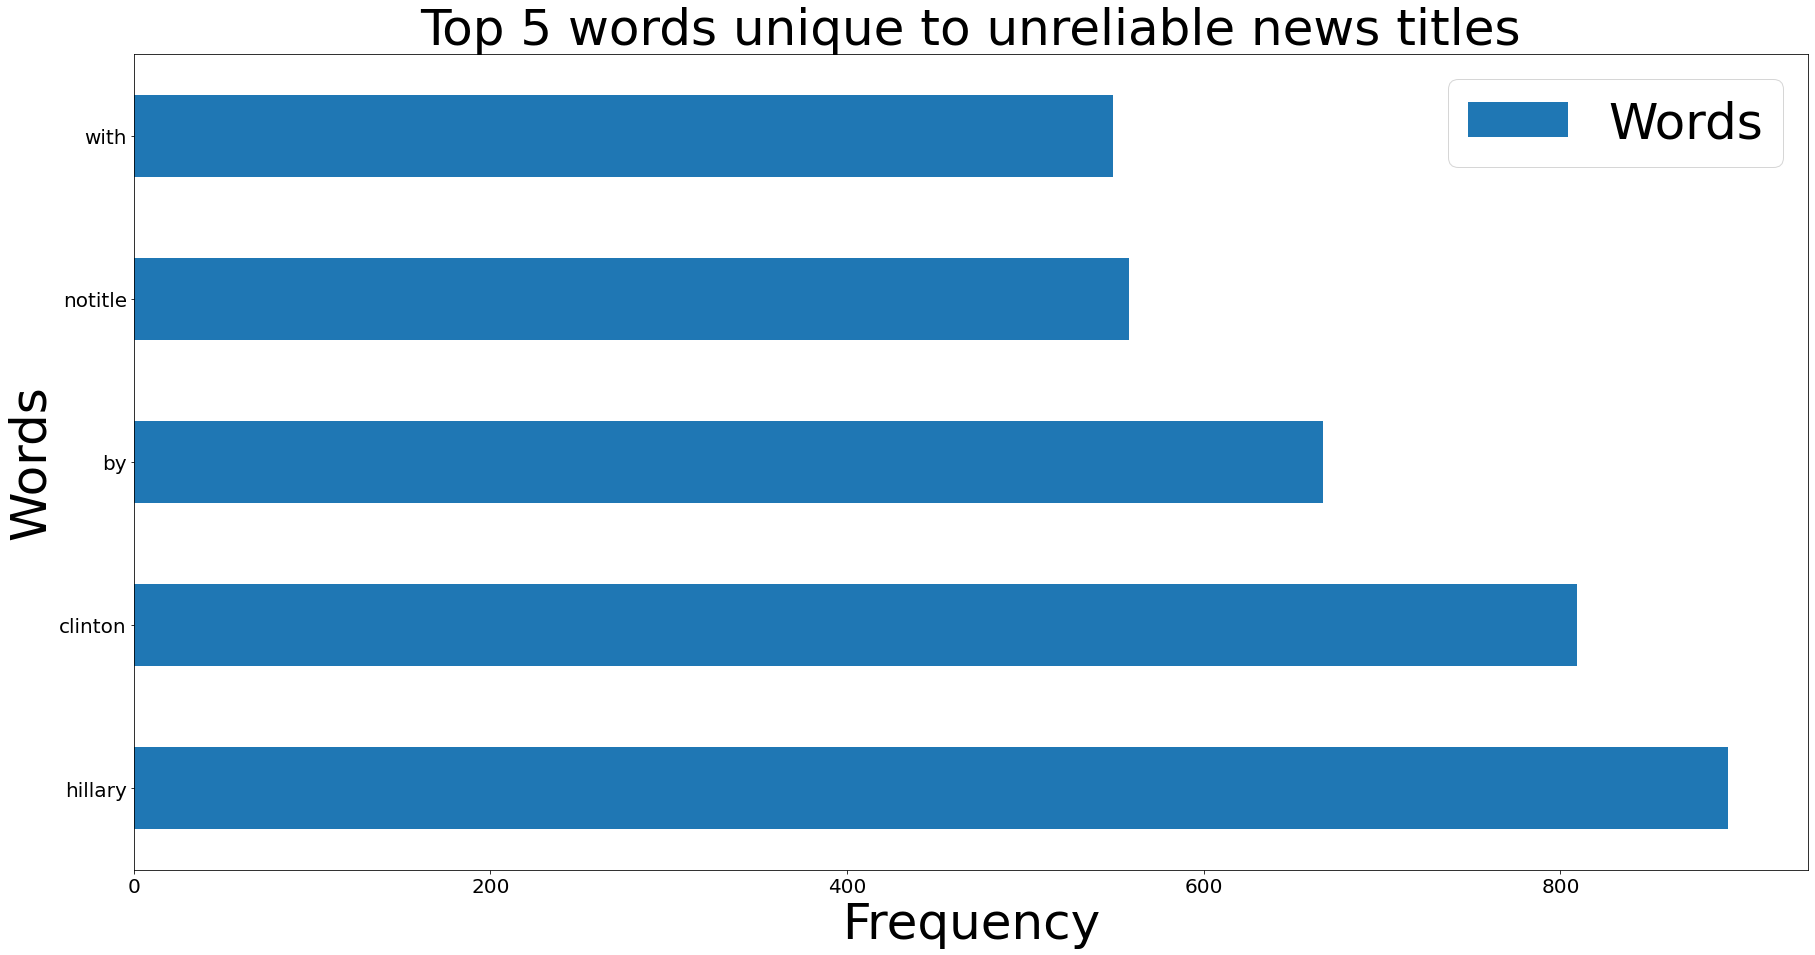

In [10]:
create_visualization_of_top_words(unique_unreliable_titles,"title",common=False,reliable=False)


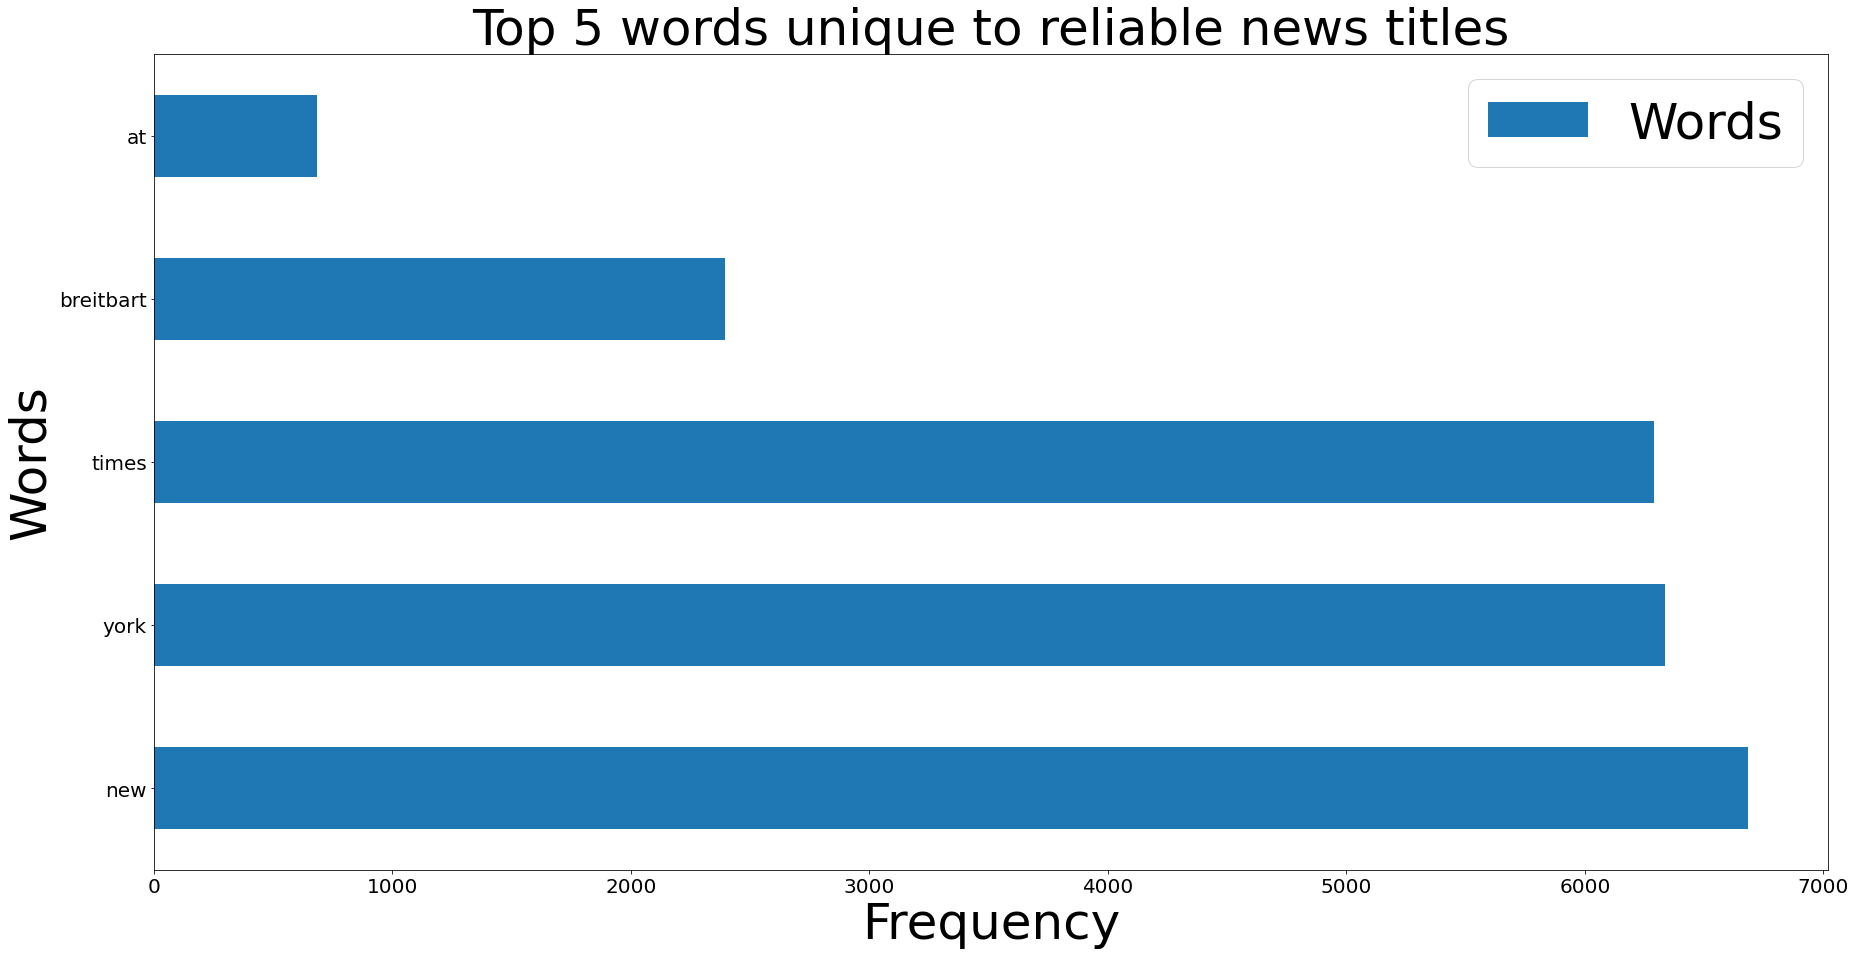

In [11]:
create_visualization_of_top_words(unique_reliable_titles,"title",common=False,reliable=True)

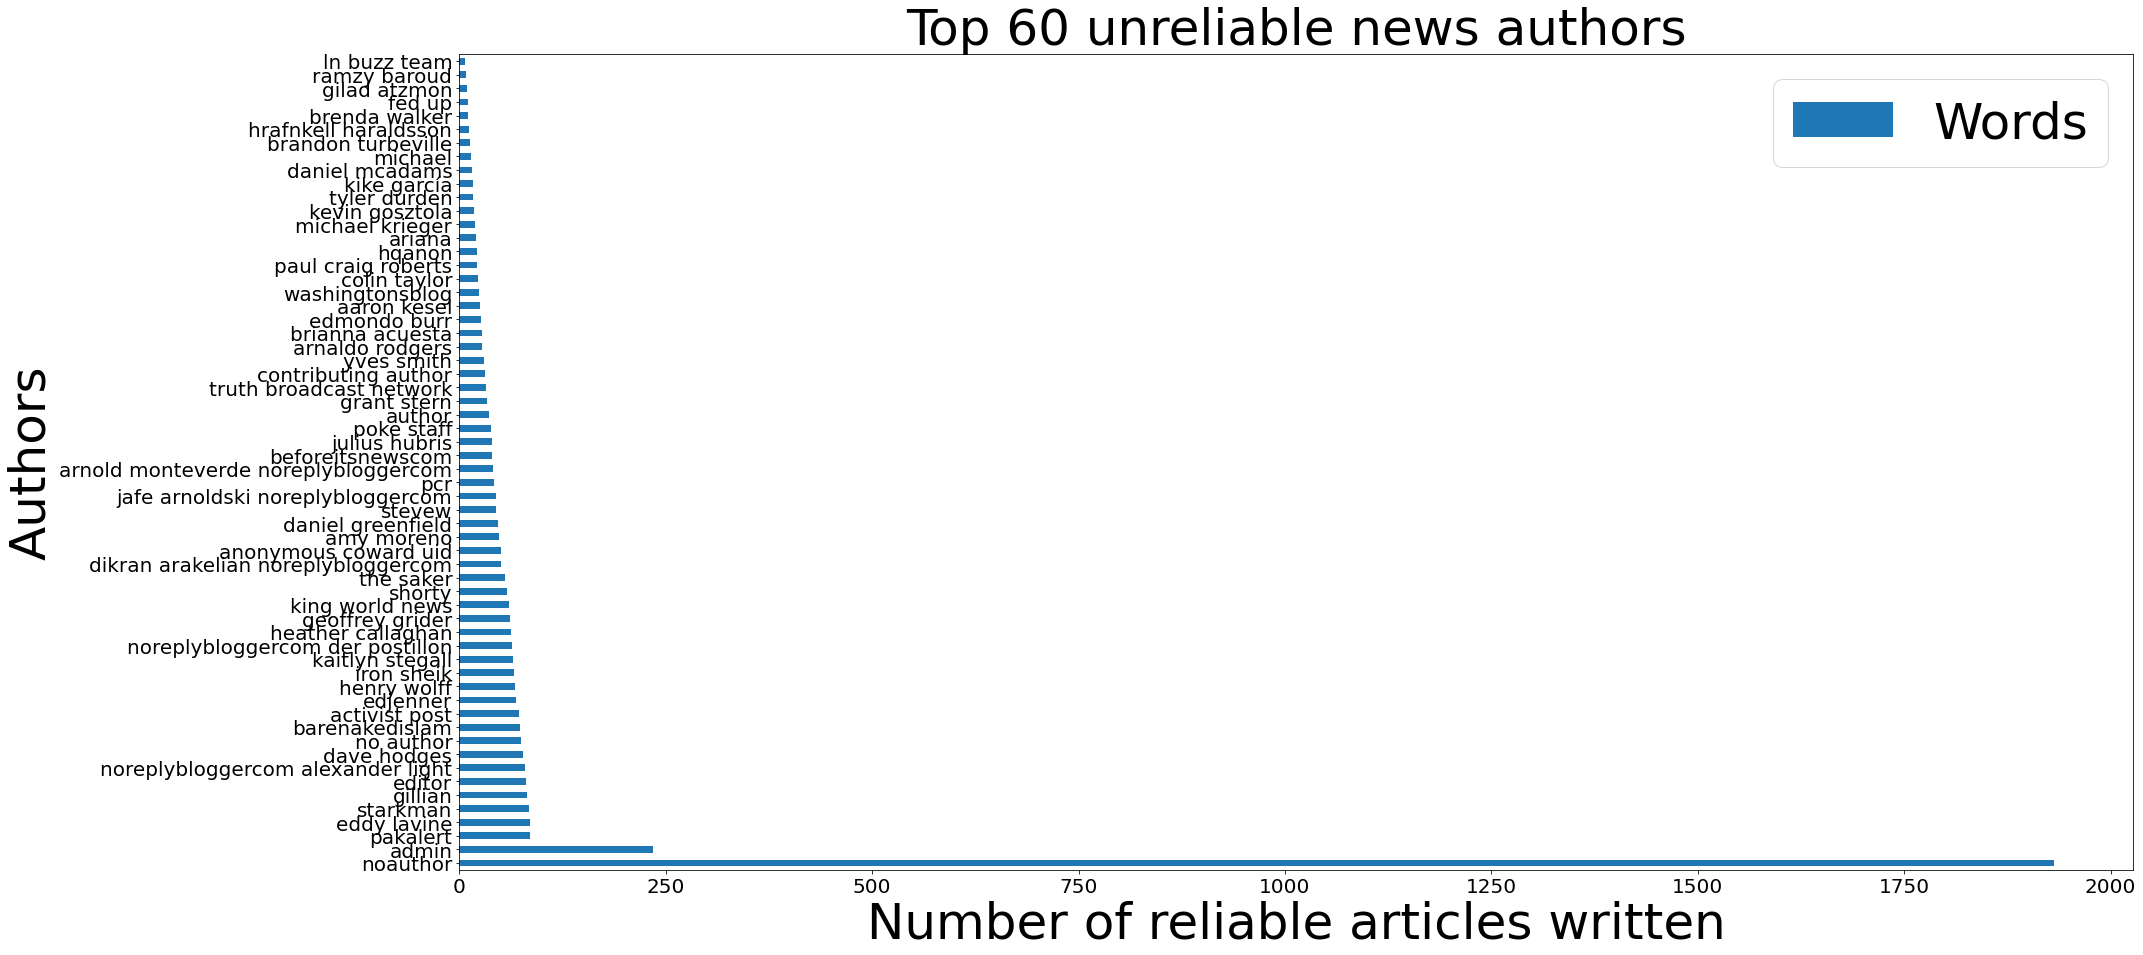

In [12]:
create_visualization_of_top_words(unique_unreliable_authors,"author",common=False,reliable=False)

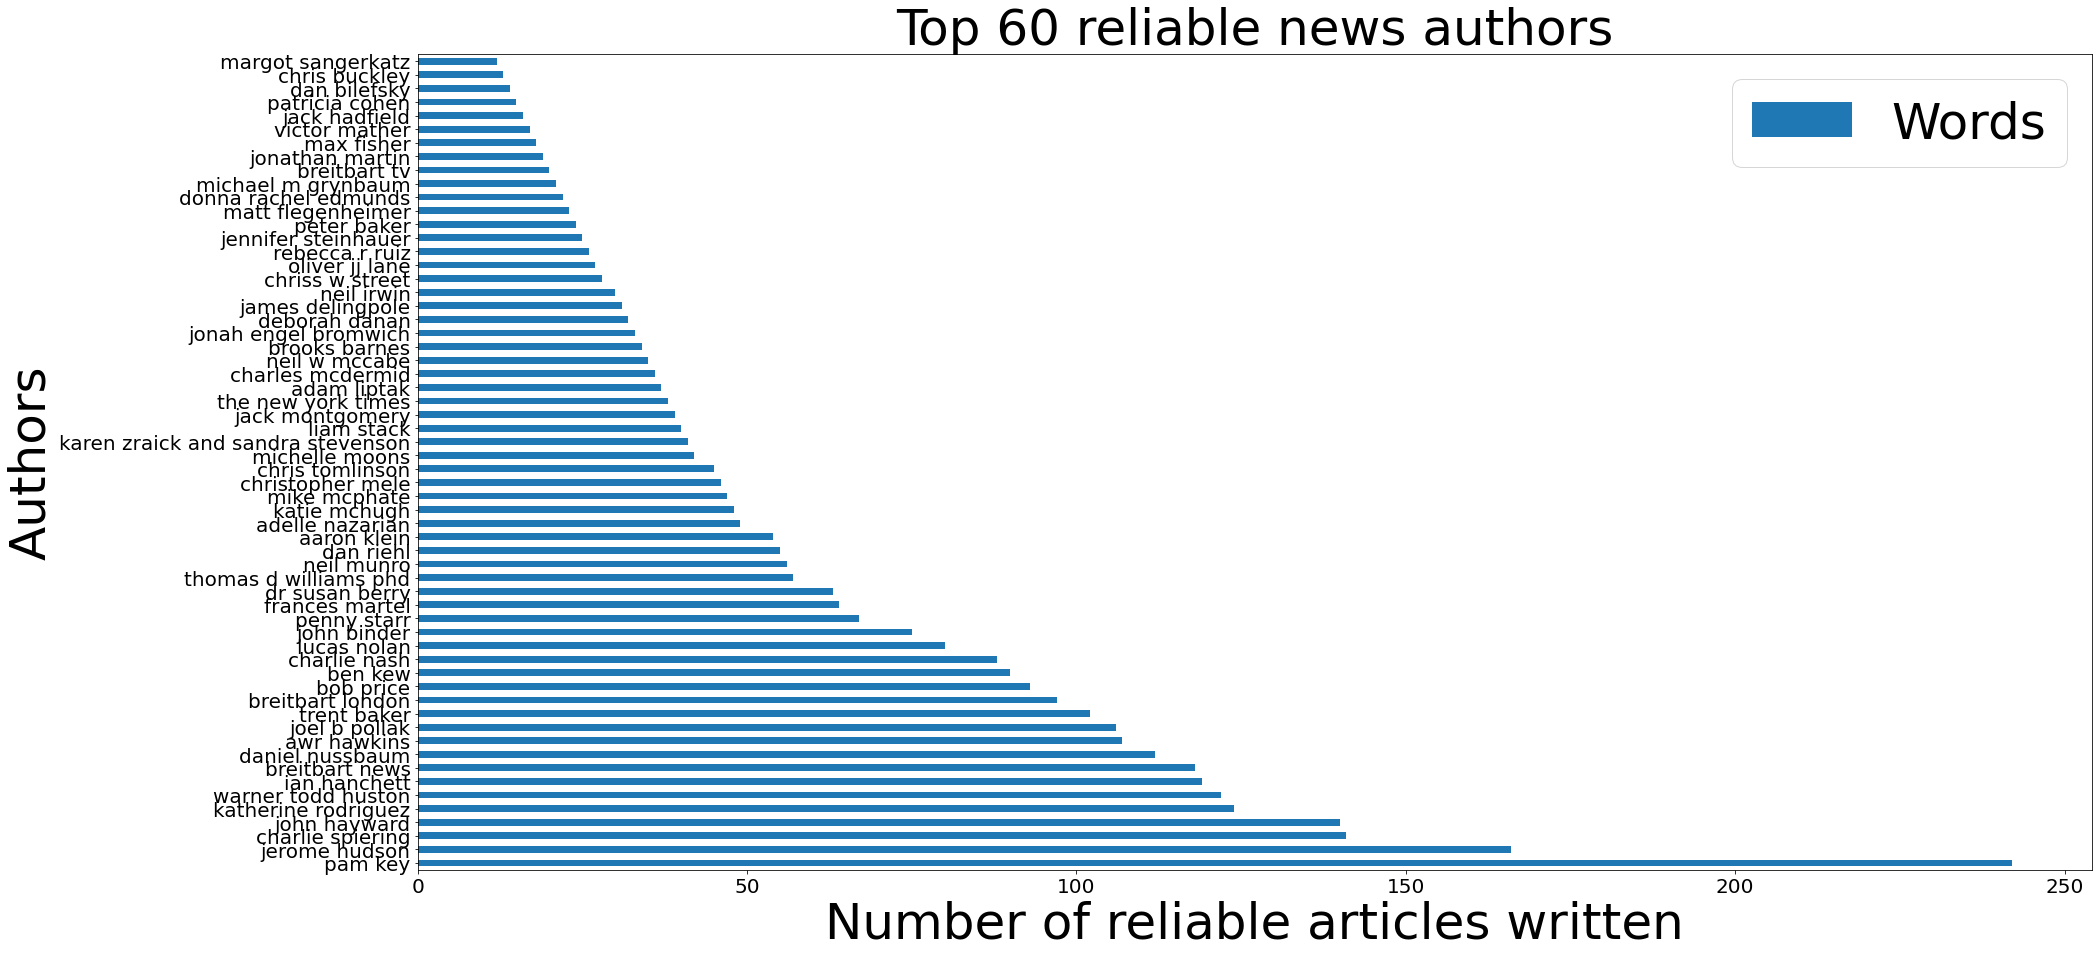

In [13]:
create_visualization_of_top_words(unique_reliable_authors,"author",common=False,reliable=True)

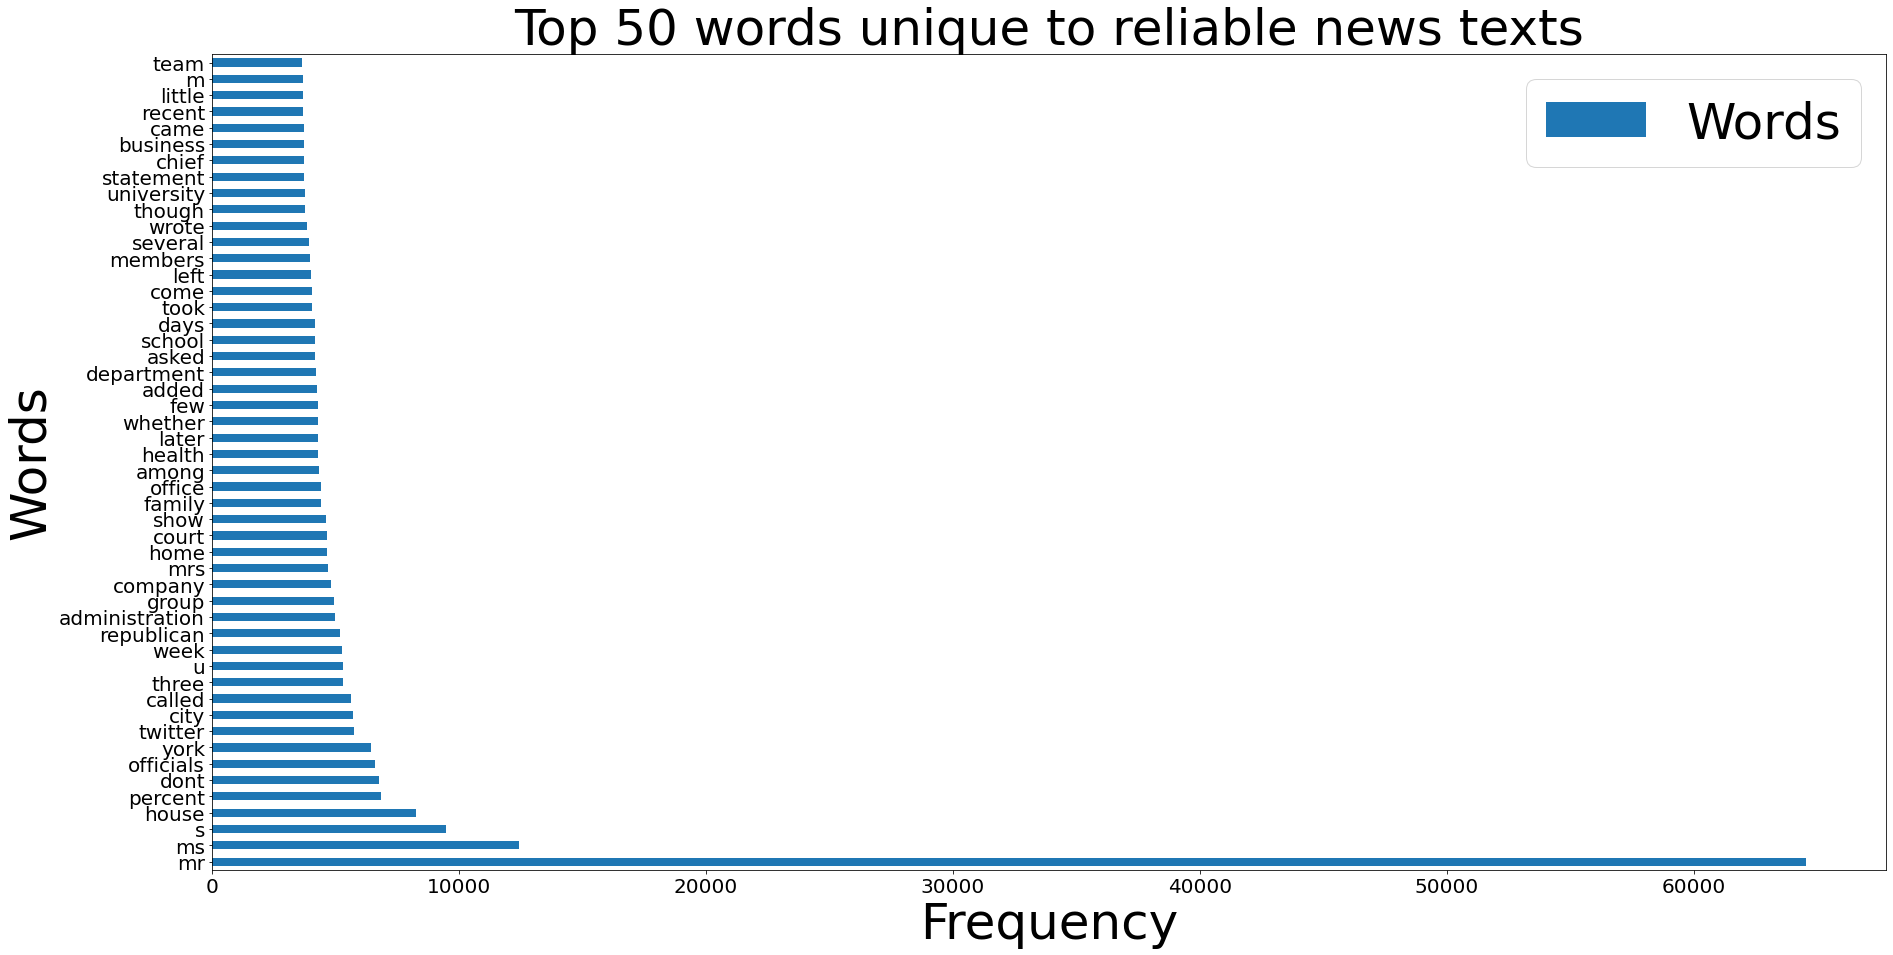

In [14]:
create_visualization_of_top_words(unique_reliable_words,"text",common=False,reliable=True)

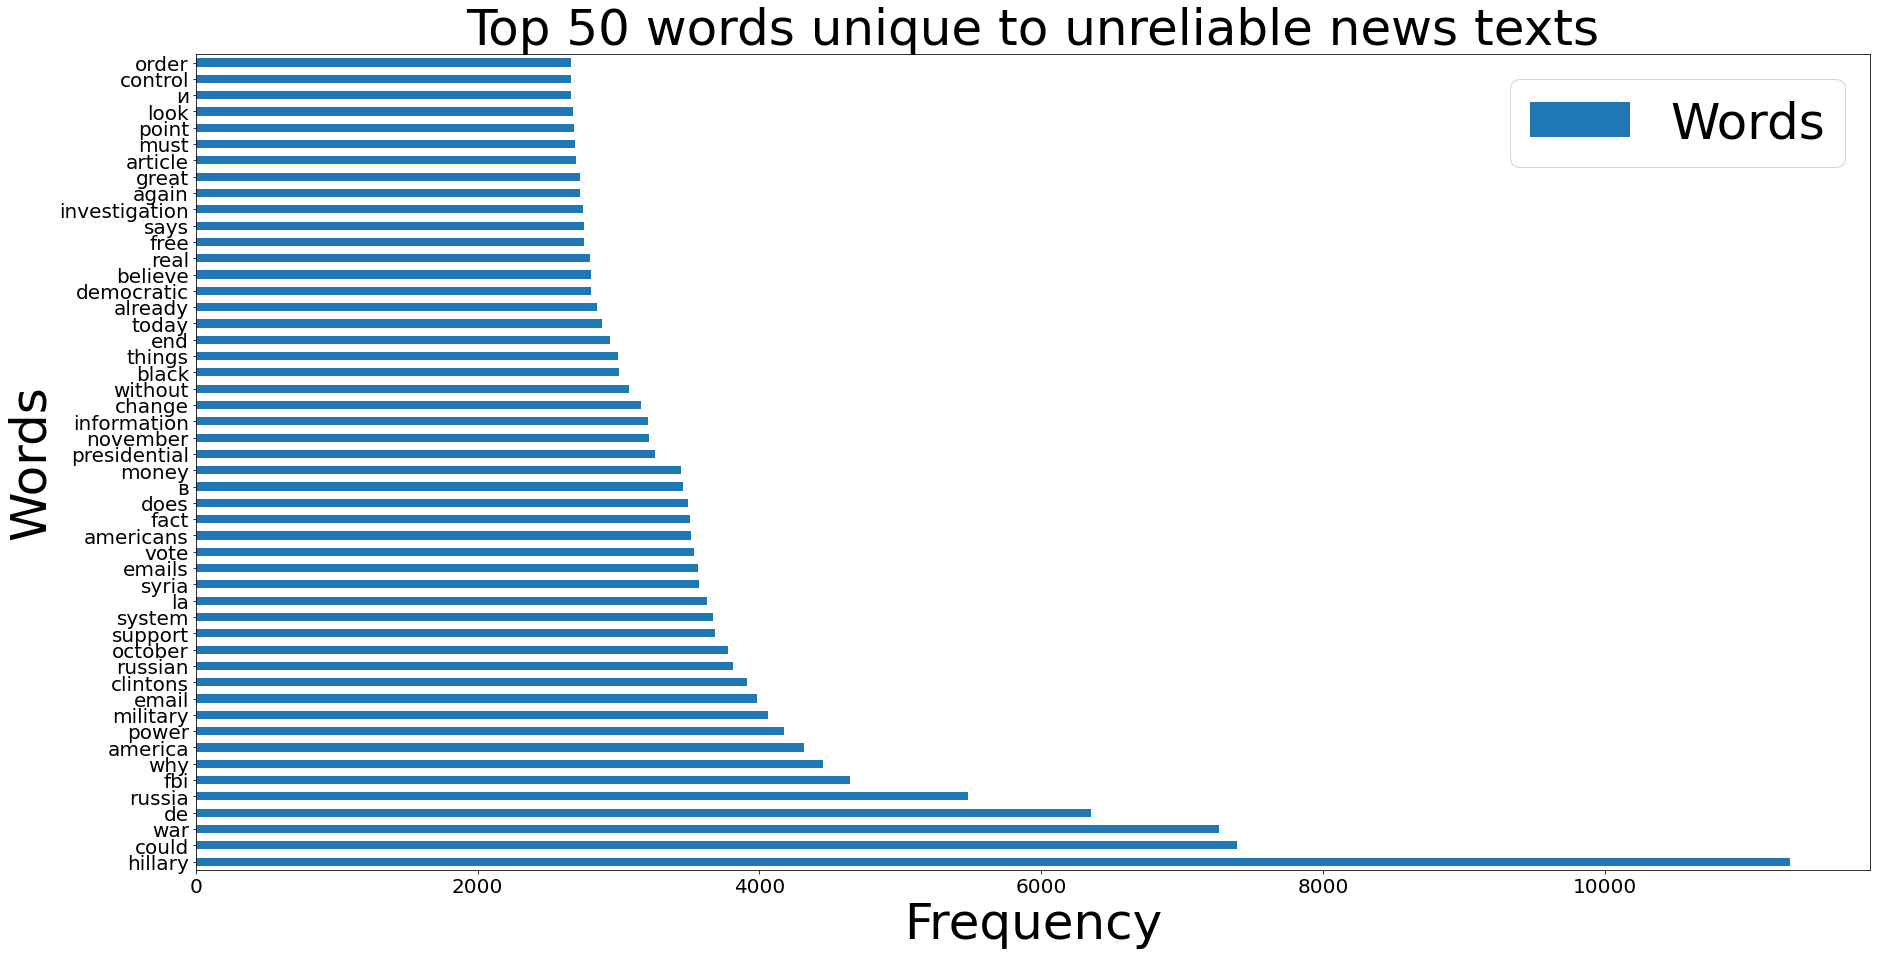

In [15]:
create_visualization_of_top_words(unique_unreliable_words,"text",common=False,reliable=False)

**Naive Bayes Implementation**

In [16]:
def training_naive_bayes_classifier(df,feature):
    words={}
    probability_reliable={}
    probability_unreliable={}
    for text in df[feature]:
        for word in text:
            if word not in words:
                words[word]=1
            else:
                words[word]+=1
    for i in range(len(df)):
        if df["label"][i]==0:
            for word in df[feature][i]:
                if word not in probability_reliable:
                    probability_reliable[word]=1
                else:
                    probability_reliable[word]+=1 
        else:
            for word in df[feature][i]:
                if word not in probability_unreliable:
                    probability_unreliable[word]=1
                else:
                    probability_unreliable[word]+=1 
    for char in probability_unreliable.keys():
        try:
            probability_unreliable[char]=probability_unreliable[char]/words[char]
        except:
            pass
    for char in probability_reliable.keys():
        try:
            probability_reliable[char]=probability_reliable[char]/words[char]
        except:
            pass
    return probability_reliable,probability_unreliable

In [17]:
def probability_author_wrote_reliable_or_unreliable_article(training_reliable_authors,training_unreliable_authors,testing_author):
    testing_author=testing_author[0]
    if testing_author not in training_reliable_authors and testing_author in training_unreliable_authors:
        return 0,1
    if testing_author in training_reliable_authors and testing_author not in training_unreliable_authors:
        return 1,0
    try:
        reliable_probability=training_reliable_authors[testing_author]/(training_reliable_authors[testing_author]+training_unreliable_authors[testing_author])
        unreliable_probability=1-reliable_probability #complement rule
        return reliable_probability,unreliable_probability
    except:
        return .5,.5
    
def compute_probability(feature_probability_reliable,feature_probability_unreliable,text):
    reliable=1
    unreliable=1
    
    for word in text:
        if word not in feature_probability_unreliable:
            unreliable*=.000001
        else:
            unreliable*=feature_probability_unreliable[word]
        if word not in feature_probability_reliable:
            if word=="no_title":
                reliable*=100000
            reliable*=10
        else:
            reliable*=feature_probability_reliable[word]
    
    try:    
        log_reliable=-1*math.log(reliable)
        log_unreliable=-1*math.log(unreliable)
        return log_reliable,log_unreliable
    except:
        return reliable,unreliable

def class_probablilty(labels):
    counter = collections.Counter(labels)
    reliable = counter[0]/sum(list(counter.values()))
    unreliable = counter[1]/sum(list(counter.values()))
    return reliable,unreliable
def Naive_Bayes_prediction(reliable_class_probability,unreliable_class_probability,classifiers,row_of_unclassified_article):
    reliable_probability=1
    unreliable_probability=1
    
    
    
    text_probability_reliable,text_probability_unreliable=classifiers[0],classifiers[1]
    author_probability_reliable,author_probability_unreliable=classifiers[2],classifiers[3]
    title_probability_reliable,title_probability_unreliable=classifiers[4],classifiers[5]
    
    text_reliable,text_unreliable=compute_probability(text_probability_reliable,text_probability_unreliable,row_of_unclassified_article["text"])
    author_reliable,author_unreliable=probability_author_wrote_reliable_or_unreliable_article(author_probability_reliable,author_probability_unreliable,row_of_unclassified_article["author"])
    title_reliable,title_unreliable=compute_probability(title_probability_reliable,title_probability_unreliable,row_of_unclassified_article["title"])
    
    reliable_probability=reliable_class_probability*text_reliable*title_reliable*author_reliable
    unreliable_probability=unreliable_class_probability*text_unreliable*title_unreliable*author_unreliable
    
    if reliable_probability>unreliable_probability:
        return 0
    if reliable_probability<unreliable_probability:
        return 1
    if reliable_probability==unreliable_probability:
        return [0,1][math.floor(random.random()*2)]



In [18]:
testing_set["text"]=list(map(text_cleaning,testing_set["text"]))
testing_set["title"] = testing_set["title"].replace(np.nan, "no_title")
testing_set["title"]=list(map(text_cleaning,testing_set["title"]))
testing_set["author"] = testing_set["author"].replace(np.nan, "no_author")
testing_set["author"]=list(map(author_cleaning,testing_set["author"]))

In [19]:
text_probability_reliable,text_probability_unreliable=training_naive_bayes_classifier(training_set,"text")
author_probability_reliable,author_probability_unreliable=training_naive_bayes_classifier(training_set,"author")
title_probability_reliable,title_probability_unreliable=training_naive_bayes_classifier(training_set,"title")

reliable_class_probability,unreliable_class_probability = class_probablilty(training_set["label"])

classifiers=[text_probability_reliable,text_probability_unreliable,author_probability_reliable,author_probability_unreliable,title_probability_reliable,title_probability_unreliable]

**Results**

In [22]:
true_labels = testing_set["label"]
pred_labels = []

for i in range(len(testing_set)):
    pred=Naive_Bayes_prediction(reliable_class_probability,unreliable_class_probability,classifiers,testing_set.iloc[i])
    if pred == None:
        pred=0
    pred_labels.append(pred)



print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(2)))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
#0 is reliable, 1 is unreliable
sn.heatmap(confusion_matrix(true_labels, pred_labels, labels=range(2)),annot=True,cmap='Blues', fmt='g')

              precision    recall  f1-score   support

           0       0.61      0.71      0.66      2339
           1       0.73      0.64      0.68      2861

    accuracy                           0.67      5200
   macro avg       0.67      0.67      0.67      5200
weighted avg       0.68      0.67      0.67      5200

[[1654  685]
 [1042 1819]]


C:\Users\12482\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:261: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all([l not in y_true for l in labels]):


ValueError: At least one label specified must be in y_true

<Figure size 720x504 with 0 Axes>